<center> <img style="float:center ; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/84/LogodelITESO.jpg" height="100px" />

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Frida María Hernández López </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Septiembre 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/FridaHernandezL/Laboratorio1_MyST'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 1 </font> <br> <br> <font color= #555555> <font size = 5> Inversión a Capitales  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> Con el propósito de poder responder la pregunta *¿Qué estrategia de inversión propondrías si tu trabajo fuera invertir 1 Millón de pesos?*

Se tiene el siguiente **caso**: 
    
Tienes 1 Millón de pesos, tienes dos opciones para invertirlos. Por un lado, puedes hacer una <span style="color:green">*Inversión Pasiva del capital*</span>, comprando el 100% del capital de títulos de un ETF que replica al mercado de renta variable mexicano S&P/BMV IPC que es el NAFTRAC. Pero por otro lado, puedes hacer una <span style="color:green">*Inversión Activa del capital*</span>, al crear un portafolio que tenga los mismos activos que el ETF y haciendo el rebalanceo por medio de un algoritmo en específico.
    
En el siguiente documento se hizo uso de herramientas financieras como *yahoo finance* para descargar precios historicos de ciertos activos y con los mismos crear dos estrategias distintas, una **inversión activa** y una **inversión pasiva**.
    
La inversión pasiva, realizada primero, consistió en crear un portafolio con precios reales manteniendo siempre los mismos pesos para cada activo considerado así como la misma cantidad de titulos, para al final observar el comportamiento y rendimiento que generaría duramte un periodo de 2 años.
    
Por el contrario la inversión activa, se llevo a cabo despues de el analisis de precios de un periodo de un año, en donde se obtuvieron los pesos ideales para cada activo y los titulos del primer mes, posterior a eso en el segundo año, mensualmente se hicieron compras y ventas de titulos según el comportamiento de cada activo. Incluyendo a cada una de las inversiones un calculo final del radio de sharpe.
    
El laboratorio concluyó en que la inversión activa generó un rendimiento mayor por una diferencia de<span style="color:green"> 267,384.46 MXN </span>lo cual es alrededor del 25% de la inversión inicial, sin embargo el radio de sharpe para la inversión activa siempre fue un poco mayor.

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

Durante el desarrollo de este laboratorio se analizaron y pusieron en comparativa dos tipos de inversión.

La primera siendo la pasiva es el enfoque de inversión a largo plazo con el objetivo de crear riqueza gradualmente a lo largo del tiempo. Al minimizar la compra y venta de valores, la inversión pasiva aumenta las ganancias a largo plazo por el ahorro de costos.

La activa no sigue los movimientos del mercado de valores, sino que compra y vende acciones cuyo valor pueda subir o bajar en un futuro cercano para generar ganancias. Implica mover constantemente las inversiones, por lo cual tiene un riesgo más alto que la inversión pasiva.

Dado lo anterior se realizó un portafolio sencillo para inversión pasiva en un periodo de dos años, y por otro lado se analizó el mercado de un año y se aplicaron los resultados de dicho analisis al año siguiente, optimizando los porcentajes capital puestos en cada accion.

Al lo largo de este documento se encontrarán explicaciones de las herramientas y analisis utilizados así como también resultados obtenidos y una breve interpretación.

Todos los codigos están en archivos importados como 'main', 'data' y 'functions', aqui solo se mostrarán resultados y variables importantes.

<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
import glob
import os
from scipy.optimize import minimize
import locale
locale.setlocale( locale.LC_ALL, '' )
import functions as fn
import main as mn
import data as dta

## <font color= #6B6B6B> 2.2 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- **And all of the above**

## <font color= #6B6B6B> 2.3 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/precios.csv : Precios históricos
- created_files/closing_prices.csv : Datos históricos guardados en un csv para evitar la sobrecarga de la computadora alc importar muchas veces de yahoofinance

## <font color= #6E6E6E> 2.3 Install Packages</font>

In [2]:
%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

<br>

# <font color= #6B6B6B> 3. Data Description </font>

<hr style="border:0.02in solid gray"> </hr>

Se trabajó con una 31 archivos *'.csv'*, cada uno representando el último día registrado del mes desde enero 2020 hasta julio 2022 que desde un inicio al leer todos los cvs se concatenaron verticalmente en un solo archivo.

Cada csv está originalmente compuesto por al rededor de 35 filas (dependiento que activos incluya) y 16 columnas:
> * Ticker  - Simbolos de cada activo
> * Nombre - Nombre de cada activo
> * Clase de activo - Equity
> * Peso - El peso que originalmente le da NAFTRAC
> * Precio - El precio de cada activo ese dia
> * Acciones - Cantidad de acciones por activo
> * Valor de mercado 
> * Valor nominal
> * Sector - Sector al que pertenece cada activo
> * ISIN
> * Bolsa de valores - Todos pertenecientes a la BMV
> * Ubicación México - MXN
> * Tipo de mercado - MXN
> * Tipo de cambio

Al hacer la importación de datos se filtraron las columnas y se leyeron unicamente las siguientes:

In [3]:
mn.data.columns

Index(['Ticker', 'Peso (%)', 'Precio', 'Acciones'], dtype='object')

Como se mencionó anteriormente no todos los archivos tenian los mismos activos, por lo tanto y para fines academicos de este laboratorio, se filtraron unicamente los activos que estabán presentes en todos los 31 meses.

Durante todo el transcurso del laboratorio se contemplaron los siguientes Tickers:

In [4]:
str(mn.tickers)

"['AC.MX', 'ALFAA.MX', 'ALSEA.MX', 'AMXL.MX', 'ASURB.MX', 'BBAJIOO.MX', 'BIMBOA.MX', 'BOLSAA.MX', 'CEMEXCPO.MX', 'CUERVO.MX', 'ELEKTRA.MX', 'FEMSAUBD.MX', 'GAPB.MX', 'GCARSOA1.MX', 'GFINBURO.MX', 'GFNORTEO.MX', 'GMEXICOB.MX', 'GRUMAB.MX', 'KIMBERA.MX', 'KOFUBL.MX', 'LABB.MX', 'LIVEPOLC-1.MX', 'MEGACPO.MX', 'OMAB.MX', 'ORBIA.MX', 'PE&OLES.MX', 'PINFRA.MX', 'TLEVISACPO.MX', 'WALMEX.MX']"

En la misma función que en la que se hizo el filtrado de tickers, se hizo también una limpieza de los mismos para que sus símbolos fueran compatibles con la plataforma *YahooFinance*. En dicha limpieza, se eliminaron símbolos extraños como 'asteriscos', así como también se agregó '.MX', todo esto para facilitar y optimizar el laboratorio

<br>

# <font color= #6B6B6B> 4. A particular Process  </font>

<hr style="border:0.02in solid gray"> </hr>

Personalmente, un proceso que me pareció relevante en este proceso; fuera de los ya obvios códigos para obtener Radio de Sharpe, Portafolios eficientes, Pesos, Capitales y Títulos, fué el mencionado justo anteriormente, los detalles de limpieza de datos antes de la implementación de un código ppara cualquier fin, son escenciales para un trabajo con la menor cantidad de problemas posibles, evitan el retrabajo y la carga computacional. Ademas de que en lo personal los encuentro relajantes 

In [5]:
str(fn.data.iloc[0:36,0].values)

"['AC*' 'ALFAA' 'ALPEKA' 'ALSEA*' 'AMXL' 'ASURB' 'BBAJIOO' 'BIMBOA'\n 'BOLSAA' 'BSMXB' 'CEMEXCPO' 'CUERVO*' 'ELEKTRA*' 'FEMSAUBD' 'GAPB'\n 'GCARSOA1' 'GCC*' 'GENTERA*' 'GFINBURO' 'GFNORTEO' 'GMEXICOB' 'GRUMAB'\n 'IENOVA*' 'KIMBERA' 'KOFUBL' 'LABB' 'LIVEPOLC.1' 'MEGACPO' 'MXN' 'OMAB'\n 'ORBIA*' 'PE&OLES*' 'PINFRA*' 'RA' 'TLEVISACPO' 'WALMEX*']"

Como se puede obeservar en comparacion entre la lista de simbolos de los activos finales (línea 4) y la lista de simbolos de activos sucios para el primer mes, se editaron nombres y se les dió el mismo formato

<br>

# <font color= #6B6B6B> 5. Another particular Process  </font>

<hr style="border:0.02in solid gray"> </hr>

Una vez más, alejandome de los procesos evidentemente relevantes para la realización de este documento académico, la visualización gráfica de los datos que se trabajan, me parece muy importante para no perder la lógica de lo que se hace y sobre todo de lo que se puede concluir al final de este laboratorio, si bien los datos nos muestran muchas caracteristicas y comportamientos relevantes, el apoyo de gráficos me parece sumamente enriquecedor durante la realización de una optimización de portafolio, para la observación de rendimientos

<br>

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

<hr style="border:0.02in solid gray"> </hr>

El objetivo de este laboratorio era poner en comparativa la inversión Pasiva con la Activa. Siendo la pasiva un proceso en el que se mantuvieron los pesos por default de NAFTRAC y unicamente se cambiaron los precios por los precios históricos, en cambio en la inversión activa se construyó un portafolio eficiente maximizando el radio de sharpe, para el primer año, calculando los pesos óptimos obtenidos desde las medias y volatilidad de precios, para posteriormente, en el segundo año, ir comprando o vendiendo titulos de acciones dependiendo de su cambio en precio.

Dado lo anterior el resultado que yo tenia como esperado era que la diferencia entre Pasiva y Activa en cuestión de rendimientos y Sharpe fuera evidentemente favorecedor para la Inversión de tipo activa, sin embargo se obtuvo lo siguiente:

In [6]:
mn.df_medidas

,Medida,Descripcion,Inv_Pasiva,Inv_Activa
0,rend_m,Rendimiento Promedio Mensual,0.360414,1.795651
1,rend_c,Rendimiento Promedio Acumulado,2.444363,17.806479
2,sharpe,Radio de Sharpe,4.603333,3.609464


La inversión pasiva, si bien no es óptima o muy rentable, muestra un mejor resultado que la inversión activa que resultó en pérdida, con una diferencia en el radio de sharpe de:

In [7]:
mn.df_medidas.iloc[2,2]-mn.df_medidas.iloc[2,3]

0.9938690616955421

<br>

## <font color= #6B6B6B> 5.1 Results of first processes. Pasive Investment</font>

Analizando la inversión pasiva paso por paso ya se explicó que los primeros pasos fueron importar los datos, concatenarlos, seleccionar unicamente las columnas que nos interesaban así como tambien hacer lo mismo con los tickers haciendo una limpieza y filtrado de los mismos.

Procedí despues a importar datos historicos de los tickers finales en las fechas en las que había cvs's, esta información se guardo en un csv llamado closing_prices.csv ya que así disminuí la carga computacional al no tener que *correr* la linea cada que entraba a editar el documento.

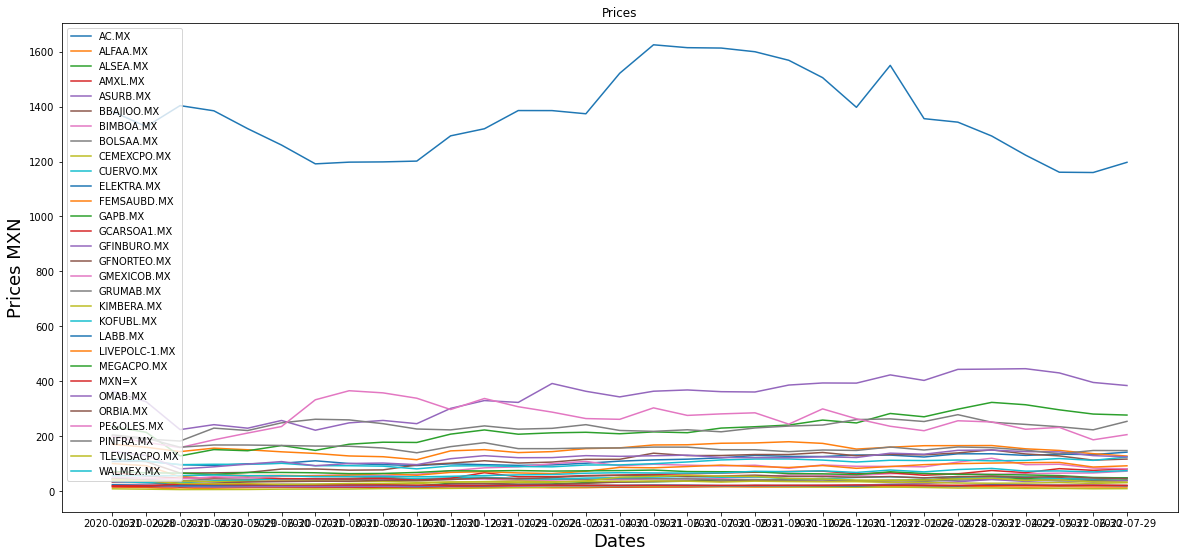

In [8]:
def prices_timeseries(data):
    plt.figure(figsize=(20,9)) 
    for i in data.columns.values:
        plt.plot( data[i],  label=i)
    plt.title('Prices')
    plt.xlabel('Dates',fontsize=18)
    plt.ylabel('Prices MXN',fontsize=18)
    plt.legend(data.columns.values, loc='best')
pasiva_ts=prices_timeseries(dta.prices1)

En el plot anterior podemos observar el comportamiento de los activos a lo largo del tiempo que nos interesa (2020-jul 2022)

Recordemos que antes de empezar con la inversión, se eliminaron algunos activos y por lo tanto sus pesos, el cash resultante de esto, es decir las ponderaciones de los tickers no considerados x el capital fue la siguiente:

In [9]:
locale.currency(mn.cash, grouping=True )

'$43,900.00'

### Postura Inicial

Tenemos ahora la postura inicial (Enero, 2020) del portafolio compuesta por una columna de simbolos de las acciones, los pesos originales, el precio obtenido de los historicos anteriormente descargados en el mes enero 2020, la postura se calculó como el peso por el capital inicial, en este caso 1'000,000.00 MXN, es decir la postura es lo que se tiene invertido en cada activo, y por último los títulos son el cálculo resultante de la postura entre el precio. 

La postura se modificó posterior al cálculo de titulos para obtener la postura considerando ya las comisiones por operaciones existentes solo en este mes ya que se compraron los activos y se *dejaron*. El calculo de las comisiones consideradas como el 0.00125 del valor de la operación que yo consideré como titulos x precio

In [10]:
dta.pin

,Ticker,Peso (%),Precio,Postura,Titulos
0,AC.MX,1.77,107.120003,17677.906499,165.0
1,ALFAA.MX,1.51,14.190000,15081.127301,1064.0
2,ALSEA.MX,0.86,45.825001,8589.231125,188.0
3,AMXL.MX,13.70,15.695000,136828.747935,8729.0
4,ASURB.MX,2.75,363.149994,27465.500751,76.0
5,BBAJIOO.MX,0.83,31.205000,8289.624338,266.0
6,BIMBOA.MX,1.87,33.805000,18676.632294,553.0
7,BOLSAA.MX,0.72,43.439999,7190.986200,166.0
8,CEMEXCPO.MX,4.30,7.595000,42946.246389,5662.0
9,CUERVO.MX,0.67,34.900002,6691.624000,192.0


### Capital y rendimientos mensuales finales

Una vez obtenida la postura inicial que nos brinda los titulos, proseguí al cálculo del capital que es resultante de la suma por mes de los titlos anteriormente obtenidos x los precios historicos. Rendimientos son el cambio porcentual del capital con la funcion *pct_change* y los rendimientos acumulados son la suma acumulada de la columna anterior

In [11]:
dta.pasiva

,timestamp,capital,rend,rend_acum
0,2020-01-31,956501.635434,-0.045477,-0.045477
1,2020-02-28,895252.154684,-0.064035,-0.109511
2,2020-03-31,755478.955673,-0.156127,-0.265639
3,2020-04-30,799311.002816,0.058019,-0.207620
4,2020-05-29,794603.265867,-0.005890,-0.213509
5,2020-06-30,828361.313332,0.042484,-0.171025
6,2020-07-31,814535.451972,-0.016691,-0.187716
7,2020-08-31,811644.680178,-0.003549,-0.191265
8,2020-09-30,824825.917123,0.016240,-0.175025
9,2020-10-30,813213.608453,-0.014078,-0.189103


Al final se terminó con un cash de:

In [12]:
locale.currency(dta.pasiva.iloc[-1,1], grouping=True )

'$1,065,000.14'

A continuación algunos gráficos por columna de los datos anteriores, muestran como el capital del portafolio va subiendo en función del tiempo, a excepcion de algunas bajadas.

El rendimeinto acumulado fue positivo a partir de febrero 2021 ya que en la grafica de rendimientos podemos observar que en marzo 2020 el valor del capital tuvo una fuerte caida, esto se puede atribuir a la situacion de pandemia en esa fecha, sin embargo para casi un año despues en febrero 2021 ya podemos observar una subida suficiente para darle rendimientos positivos al portafolio. Esto muesta la importancia de darle el tiempo suficiente a una inversión pasiva.

Una inversión de este tipo requiere tiempo para mostrar rendimientos positivos en caso de caidas de precio. Si se hubiera hecho la inversión de solo 1 año no habria alcanzado a haber rendimientos como los hubo.

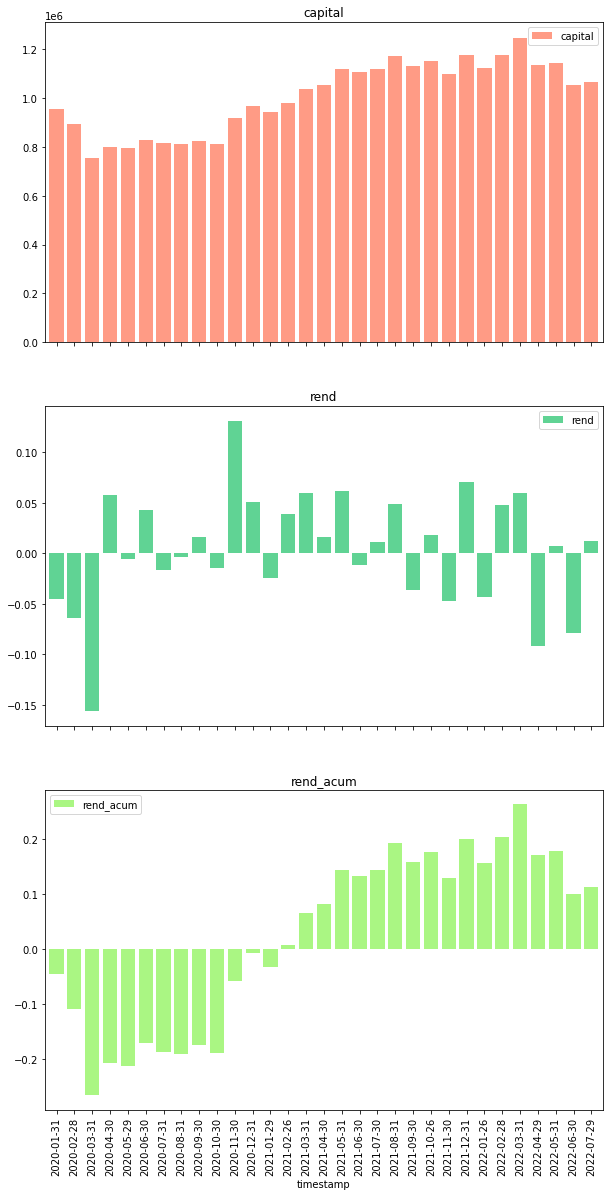

In [13]:
def pasive_plot(dataframe):
    dataframe.plot(kind = 'bar',
                 width=0.8,
                 subplots=True,
                 figsize=(10,20),
                   color=["#FF9B85","#60D394","#AAF683"]);
pasiva_suplot=pasive_plot(mn.pasivaplot)

### Radio de Sharpe

Recordemos que el Radio de Sharpe mide numéricamente la relación Rentabilidad / Volatilidad Histórica (desviación standard) de un Fondo de Inversión.

Para el cálculo del Radio se Sharpe me apoyé de una metodología vista en semestres pasados. Especificamente la clase Portafolios de Inversión, 5to semestre. el cual utiliza varianza, volatilidad media, rendimientos medios y pesos. El anterior calculo dio como resultado un RS de:

In [14]:
dta.pasive_rs

4.60333304348255

Calculandolo como (los rendimientos mensuales - tasa libre de riesgo considerada como 8.5% )/ volatilidad da un resultado de:

In [15]:
(dta.pasiva.iloc[:,2].mean()-0.085)/dta.pasiva.iloc[:,2].std()

-1.413292233589093

<br>

## <font color= #6B6B6B> 5.2 Results of another proces. Active Investment </font>

Pasando ahora a la inversión activa se tomaron en cuenta los mismos datos historicos a diferencia de que en este caso primero se hizo un portafolio eficiente maximizando sharpe con los precios historicos de enero 2020 - enero 2021. El anterior procedimiento se hizo con los conocimientos y códigos de una clase anterior, especificamente Portafolios de Inversión, cursada en 5to semestre.

Los pesos resultantes de dicho portafolio eficiente fueron los siguientes:

In [16]:
np.round(dta.w_emv,7)*100

array([16.00622,  0.     ,  0.     , 20.4876 ,  0.     ,  0.     ,
       18.94952, 15.08864,  0.     ,  0.     ,  2.96535,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  4.05092,
        0.     ,  0.     , 22.37912,  0.     ,  0.     ,  0.     ,
        0.     ,  0.07263,  0.     ,  0.     ,  0.     ])

Así como también se obtuvo el radio de shape, con valor de:

In [17]:
dta.rsmax

0.9755326273822787

Teniendo como resultado este radio de sharpe con los pesos anteriores, mi hipotesis era que la activa obtendría un mucho mayor rendimiento que la pasiva.

### Frontera de minima varianza

Se realizó tambien el calculo de la frontera de minima varianza, con apoyo de los códigos de la clase anteriormente mencionada (para fines de claridad se mostrará unicamente el grafico, sin embargo dejo comentada la celda de el dataframe de dicha frontera), y se obtuvo lo siguiente:

In [18]:
#dta.frontera

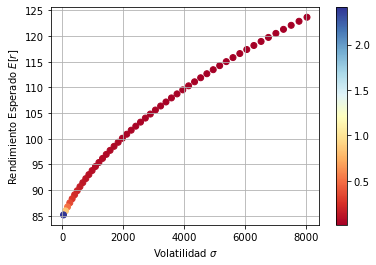

In [19]:
def frontera_ef(frontera):
    plt.figure(figsize=(6,4))
    plt.scatter(frontera['Vol'],frontera['Media'],c=frontera['RS'],cmap='RdYlBu')
    plt.grid()
    plt.xlabel('Volatilidad $\sigma$')
    plt.ylabel('Rendimiento Esperado $E[r]$')
    plt.colorbar()
fronteraef=frontera_ef(dta.frontera)

### Portafolio Eficiente

Una vez obtenidos los pesos se construyó el dataframe mostrado a continuación el cual es el portafolio eficiente inicial, en donde tenbemos una columna de símbolos de las acciones, pesos con los pesos eficientes, postura la cual es el resultado de los pesos por el capital inicial 1´000,000 MXN, precio que son los precios historicos para enero 2021 en cada acción y los titulos que se calcularon como la postura entre el precio

In [20]:
dta.Peficiente

,index,Pesos%,Postura,Precio,Titulos
0,AC.MX,1.600622e+01,1.600622e+05,93.070000,1720.0
1,ALFAA.MX,0.000000e+00,0.000000e+00,12.900000,0.0
2,ALSEA.MX,0.000000e+00,0.000000e+00,23.110001,0.0
3,AMXL.MX,2.048760e+01,2.048760e+05,13.670000,14987.0
4,ASURB.MX,3.319315e-11,3.319315e-07,322.529999,0.0
5,BBAJIOO.MX,0.000000e+00,0.000000e+00,24.760000,0.0
6,BIMBOA.MX,1.894952e+01,1.894952e+05,38.520000,4919.0
7,BOLSAA.MX,1.508864e+01,1.508864e+05,46.000000,3280.0
8,CEMEXCPO.MX,0.000000e+00,0.000000e+00,11.760000,0.0
9,CUERVO.MX,1.668986e-12,1.668986e-08,43.730000,0.0


### Operaciones

A continuación se hizo una iteracion al mes, durante 2021-2022 en la que se estudiaba si los precios habian bajado más del 5% de su precio anterior se vendía el 2.5% de los titulos en esa acción , de haber tenido una alza del 5% en los precios, ocurría lo contrario y se adquirían 2.5% más de titulos.

Titulos totales en la primera fila son la suma de los titulos en la tabla anterior, el cash_acum representa el capital disponible en ese momento siendo el primer monto de 970,000 descontando del capital inicial el 3% que representa los activos obviados, la comision acumulada al ser cada venta o compra una operación que nos cuesta cierta comisión esto se considera para restarselo al capital, y el rendimiento que es el cambio en capital que se tiene.

Fuí iterando en una data *yeartwo* que tenia los precios historicos mensuales de 2021-2022 para cada activo si el dia siguiente era habia subido su precio 5% o más entonces se aumentaban 2.5% titulos, si habia bajado 5% o mas entonces se vendían 2.5% de los titulos, por cada mes que se hacía eso en todos los activos, se hacía una suma de todos los titulos que se resultaba tener por fecha y se depositaban en titulos totales, titulos_op representa la diferencia entre los titulos que se tienen en el mes presente y los que se tenian el mes anterior (cuando es negativo es que se vendieron esa cantidad de titulos y cuando es positivo es que se compraron esa cantidad de titulos). El cash_acum para cada mes fue calculado como la suma total de (el cash del mes anterior + (el precio al que cambió cada activo * los titulos nuevos de cada activo)).

In [21]:
dta.df_op

,timestamp,titulos_totales,titulos_op,cash_acum,comision_x_op,comision_acum,rend,rend_acum
0,2021-01-29,34700.0,34700.0,970000.0,0.000,0.000,0.000000,0.000000
1,2021-02-26,35408.0,708.0,987236.037,1234.045,1234.045,0.017769,0.017769
2,2021-03-31,36293.0,885.0,1012463.644,1265.580,2499.625,0.025554,0.043323
3,2021-04-30,36941.0,648.0,1026447.264,1283.059,3782.684,0.013811,0.057134
4,2021-05-31,37864.0,923.0,1054343.183,1317.929,5100.613,0.027177,0.084312
5,2021-06-30,38811.0,947.0,1082664.286,1353.330,6453.943,0.026861,0.111173
6,2021-07-30,39025.0,214.0,1093947.621,1367.435,7821.378,0.010422,0.121595
7,2021-08-31,40001.0,976.0,1126334.415,1407.918,9229.296,0.029605,0.151200
8,2021-09-30,40136.0,135.0,1143775.547,1429.719,10659.015,0.015485,0.166685
9,2021-10-29,41140.0,1004.0,1177920.984,1472.401,12131.416,0.029853,0.196538


Se puede observar que mayormente se consideraron compras para cada mes, es decir que los precios iban a la alza, ya que hubo solamente 3 meses en los que la cartera de titulos se redujo. Concluyendo el periodo de tenencia de este portafolio se finalizó con un cash, considerando comisiones, de:

In [22]:
locale.currency(dta.casha, grouping=True )

'$1,332,384.60'

### Visualización de rendimientos

Para observar mejor los rendimientos en el tiempo que se analizó 2021-2022, se muestra el siguiente plot:

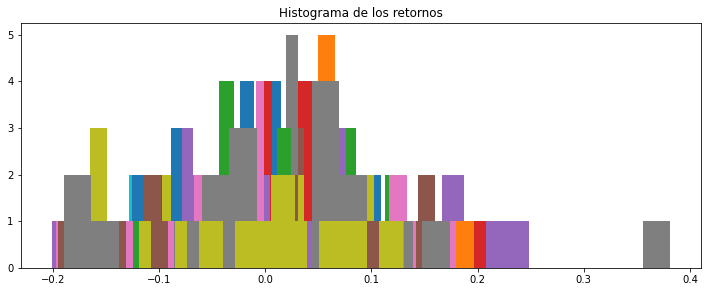

In [23]:
def rend_active(data):
    ret=data.pct_change().dropna()
    plt.figure(figsize=(12.2,4.5)) 
    for i in ret.columns.values:
        plt.hist( ret[i],  label=i, bins = 22)
    plt.title('Histograma de los retornos')
    #plt.legend(ret.columns.values,loc='best')
    plt.show()
rend_plot=rend_active(dta.yeartwoplot)

### Radio de Sharpe

Para el cálculo del Radio se Sharpe me apoyé de una metodología vista en semestres pasados. Especificamente la clase Portafolios de Inversión, 5to semestre. el cual utiliza varianza, volatilidad media, rendimientos medios y pesos. El anterior calculo dio como resultado un RS de:

In [24]:
dta.active_rs

3.609463981787008

Calculandolo como (los rendimientos mensuales - tasa libre de riesgo considerada como 8.5% )/ volatilidad da un resultado de:

In [25]:
(dta.df_op.iloc[:,6].mean()-0.085)/dta.df_op.iloc[:,6].std()

-5.976801707123513

## <font color= #6B6B6B> 5.3 Conclusions on both Investments </font>

Si bien los radios de sharpe para ambos tipos de inversión no era esperanzador, si vemos los capitales al final de cada una obtenermos que la inversión activa tuvo un mayor rendimiento:

In [26]:
print ('Cash Pasiva:', locale.currency(dta.pasiva.iloc[-1,1], grouping=True))
print ('Cash Activa',locale.currency(dta.casha, grouping=True ))
print ('Diferencia en Cash',locale.currency(dta.casha-dta.pasiva.iloc[-1,1], grouping=True))

Cash Pasiva: $1,065,000.14
Cash Activa $1,332,384.60
Diferencia en Cash $267,384.46


<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

> * Documentacion Python
> * Documentos de Portafolios de inversión

<br>